<a href="https://colab.research.google.com/github/blackcolver88/Data-analysis-mini-project/blob/main/Mini_projet_analyse_de_donn%C3%A9e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import numpy as np

df = pd.read_excel("commerce.xlsx")
print(df)
print(df.head())
print(df.describe())

    Unnamed: 0                   Horodateur   sexe achat_en_ligne       âge   \
0            0  2023/04/02 2:27:17 AM UTC+1  Homme            oui  36-45 ans   
1            1  2023/04/02 2:28:44 AM UTC+1  Femme            oui  18-25 ans   
2            2  2023/04/02 2:28:48 AM UTC+1  Homme            non  36-45 ans   
3            3  2023/04/02 2:29:50 AM UTC+1  Homme            oui  18-25 ans   
4            4  2023/04/02 2:29:59 AM UTC+1  Homme            non  18-25 ans   
..         ...                          ...    ...            ...        ...   
58          58  2023/04/05 1:28:03 PM UTC+1  Homme            oui  18-25 ans   
59          59  2023/04/05 2:38:45 PM UTC+1  Homme            oui  18-25 ans   
60          60  2023/04/05 8:42:43 PM UTC+1  Homme            oui  18-25 ans   
61          61  2023/04/06 2:41:39 PM UTC+1  Homme            oui  18-25 ans   
62          62  2023/04/06 5:18:39 PM UTC+1  Femme            oui  18-25 ans   

         région            profession  

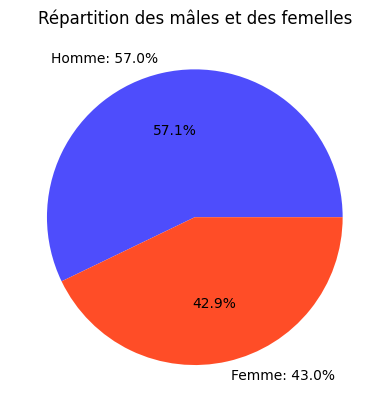

In [ ]:
# df est le DataFrame qui contient les données
# Convertion 'sexe' colonne au categorical avex des niveaux specifiées
df['sexe'] = pd.Categorical(df['sexe'], categories=["Femme", "Homme"])
# Calculate frequency table
freq = df['sexe'].value_counts()
# Calcule des pourcentages
pct1 = round(freq / sum(freq) * 100)
# Create labels
labls1 = [f"{x}: {y}%" for x, y in zip(freq.index, pct1)]
# Plot pie chart
plt.pie(freq, labels=labls1, colors=plt.cm.rainbow([0.1, 0.9]), autopct='%1.1f%%')
plt.title("Répartition des mâles et des femelles")
plt.show()

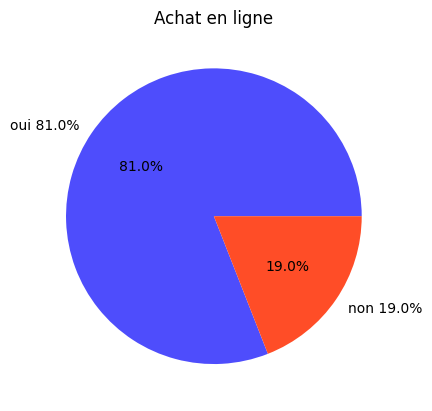

In [ ]:
# Convertion de 'achat_en_ligne' colonne au categorical
df['achat_en_ligne'] = pd.Categorical(df['achat_en_ligne'], categories=["oui", "non"])

# Calcule du frequence
freq3 = df['achat_en_ligne'].value_counts()

# Calcule des pourcentages
pct3 = round(freq3 / freq3.sum() * 100)

# Create labels
labls3 = [f"{label} {percentage}%" for label, percentage in zip(freq3.index, pct3)]

# Create pie chart
plt.pie(freq3, labels=labls3, colors=plt.cm.rainbow([0.1, 0.9]), autopct='%1.1f%%')
plt.title('Achat en ligne')
plt.show()



In [ ]:
df.columns = df.columns.str.strip()
# Convertion 'profession' colonne au categorical
df['profession'] = pd.Categorical(df['profession'], categories=["Etudiant", "Femme au foyer", "Fonctionnaire", "Commerçant", "Profession libérale", "Ouvrier/ Agriculteur", "Autre profession"])
# Calcule de la frequence
freq2 = df['profession'].value_counts()

print(freq2)


profession
Etudiant                43
Autre profession         5
Profession libérale      4
Femme au foyer           1
Fonctionnaire            1
Commerçant               1
Ouvrier/ Agriculteur     0
Name: count, dtype: int64


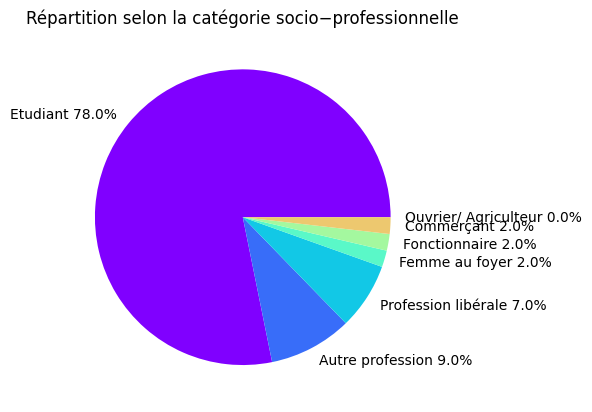

In [ ]:
# Calcule des pourcentages
pct2 = round(freq2 / freq2.sum() * 100)

# Creation des labels
labels2 = [f"{category} {percentage}%" for category, percentage in zip(freq2.index, pct2)]

# Creation pie chart
plt.pie(freq2, labels=labels2, colors=plt.cm.rainbow([x/7 for x in range(7)]))
plt.title("Répartition selon la catégorie socio−professionnelle")
plt.show()

In [ ]:
# Convertion 'âge' colonne au categorical avec des niveaux spécifiques
df['âge'] = pd.Categorical(df['âge'], categories=["Moins de 18 ans", "18-25 ans", "26-35 ans", "36-45 ans", "46-55 ans", "plus de 55 ans"])

# Calcule de la frequence
freq3 = df['âge'].value_counts()

print(freq3)

âge
18-25 ans          45
26-35 ans           4
36-45 ans           4
Moins de 18 ans     1
plus de 55 ans      1
46-55 ans           0
Name: count, dtype: int64


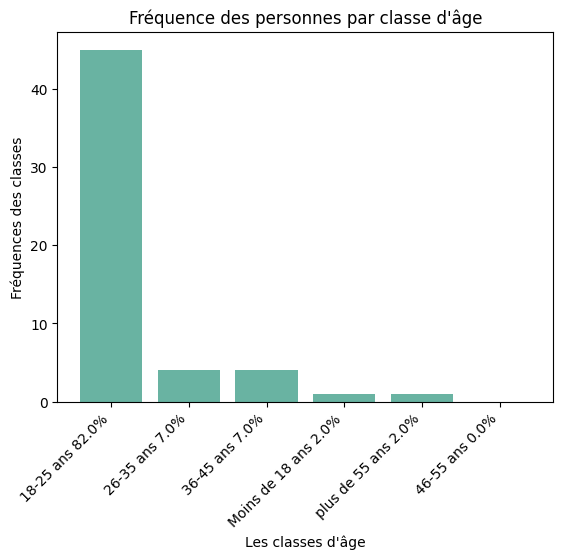

In [ ]:
# Calcule des pourcentages
pct3 = round(freq3 / freq3.sum() * 100)

# Creation des labels
labels3 = [f"{age} {percentage}%" for age, percentage in zip(freq3.index, pct3)]

# Creation bar plot
plt.bar(freq3.index, freq3, color='#69b3a2', tick_label=labels3)
plt.title("Fréquence des personnes par classe d'âge")
plt.xlabel("Les classes d'âge")
plt.ylabel("Fréquences des classes")
plt.xticks(rotation=45, ha='right')  # Rotation x-labels pour une meilleur lecture
plt.show()
# A propos:
#Le vecteur "freq3" contient le nombre d'individus dans chaque classe d'âge.
#Le vecteur "pct3" calcule la proportion de personnes dans chaque classe d'âge en pourcentage.
#Le vecteur "lbls3" combine les proportions en pourcentage et les libellés de chaque classe d'âge pour créer des étiquettes pour chaque barre sur le graphique.

région
Nord-Est        25
Sud-Est         12
Grand-tunis      9
Nord-Ouest       3
Centre-Est       3
Centre-Ouest     2
Sud-Ouest        1
Name: count, dtype: int64
région
Nord-Est        25
Sud-Est         12
Grand-tunis      9
Nord-Ouest       3
Centre-Est       3
Centre-Ouest     2
Sud-Ouest        1
Name: count, dtype: int64


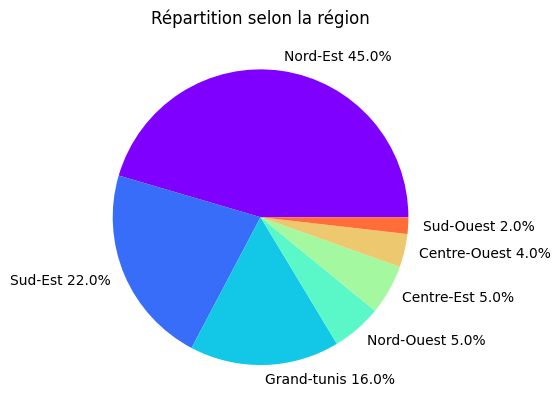

In [ ]:
# Convertion 'région' column au categorical avec des niveaux specifiques
df['région'] = pd.Categorical(df['région'], categories=["Nord-Ouest", "Nord-Est", "Centre-Ouest", "Centre-Est", "Sud-Ouest", "Sud-Est", "Grand-tunis"])

# Calculate frequency for the first table
freq2 = df['région'].value_counts()
print(freq2)

# Reorder the levels to match the order specified
df['région'] = pd.Categorical(df['région'], categories=["Nord-Ouest", "Nord-Est", "Centre-Ouest", "Centre-Est", "Sud-Ouest", "Sud-Est", "Grand-tunis"])

# Calculate frequency for the second table after reordering
freq3 = df['région'].value_counts()
print(freq3)

# Calculate percentages
pct3 = round(freq3 / freq3.sum() * 100)

# Create labels
labels3 = [f"{region} {percentage}%" for region, percentage in zip(freq3.index, pct3)]

# Create pie chart
plt.pie(freq3, labels=labels3, colors=plt.cm.rainbow([x/7 for x in range(7)]))
plt.title("Répartition selon la région")
plt.show()


In [ ]:
# Interprétation générale:

#On remarque que notre échantilon est principalement composé de jeunes agé de 20 à 25ans (supérieur à 50%),tel que leur région est le nord-est(45%) et il sont principalement des étudiants(78%).

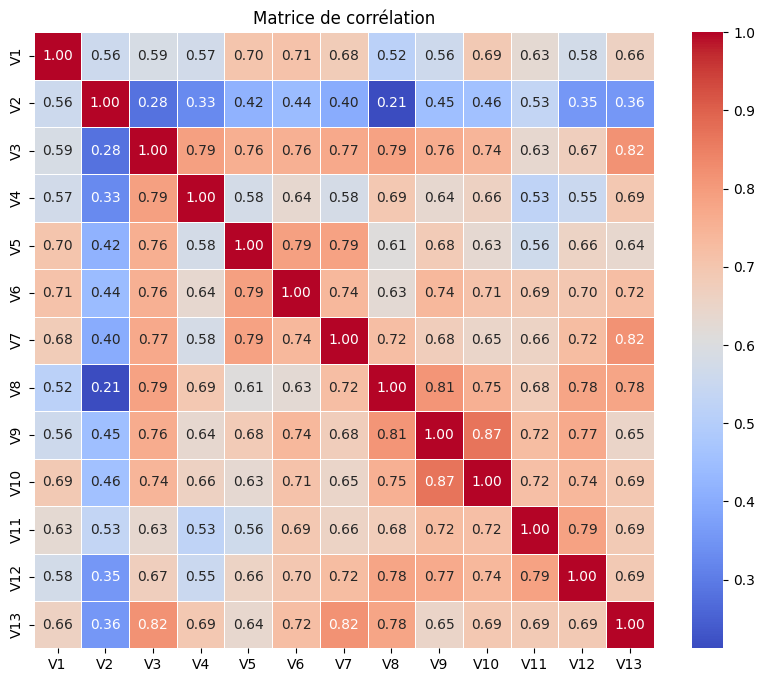

In [ ]:
# Selection subset des colonnes
df_subset = df[["Clarté du site", "Design du site", "choix", "La variété", "Délais_de_livraison",
                "Transparence des conditions de vente", "Sécurité_de_paiement", "Prix produit",
                "Les remises", "Les_promotions", "Possibilité de contacter l-entreprise",
                "Possibilité de retour", "Qualité du produit"]]

# Renomer des colonnes
df_subset.columns = ["V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13"]

# Drop rows with missing values
df_subset = df_subset.dropna()

# Calcule de la correlation de la matrix
corr_matrix = df_subset.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()


In [ ]:
# Commentaire:
#Il ya une forte corrélation entre les variables(v7,v6,v5,v13,v10 sont fortement corrélés à v1 et v4...v10 et v13 sont fortement corrélés à v3).

In [ ]:
### Valeurs propres / Variances:
#Les valeurs propres (eigenvalues en anglais) mesurent la quantité de variance expliquée par chaque axe principal. Nous examinons les valeurs propres pour déterminer le nombre de composantes principales à prendre en considération. Les valeurs propres et la proportion de variances (i.e.information) retenues par les composantes principales peuvent être extraites à l’aide de la fonction get_eigenvalue() [package factoextra].

In [ ]:
# Perform PCA
pca = PCA()
res_pca = pca.fit(df_subset)

# Get explained variance ratio
explained_variance_ratio = res_pca.explained_variance_ratio_

# Get eigenvalues
eigenvalues = res_pca.explained_variance_

# Rename the axes
names = ["V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13"]

In [ ]:
# Interprétation:
#Ce code permet de réaliser une Analyse en Composantes Principales (ACP) sur un sous-ensemble de variables du jeu de données initial, qui ont été renommées et nettoyées de leurs valeurs manquantes telque l'ACP est une technique d'analyse multivariée qui permet de réduire la complexité d'un jeu de données en le projetant sur un nouvel espace à plus faible dimension, tout en préservant autant que possible l'information contenue dans les variables d'origine.
#La distance entre les variables et l’origine mesure la qualité de représentation des variables. Les variables qui sont loin de l’origine sont bien représentées par l’ACP.

#Dans ce cas précis, l'objectif de l'analyse est de mettre en évidence des relations entre les différentes variables étudiées, qui sont toutes des critères d'évaluation de sites de vente en ligne. L'ACP va permettre de déterminer des axes principaux qui expliquent la variance des données, ainsi que des scores pour chaque observation (dans ce cas-ci, chaque site de vente en ligne) sur chaque axe.

#Le 1 er axe (bon service d'achat)est positivement corrélé avec presque tous les variables sauf V2 qui est corrélé avec le 2 eme axe.
#Le 2 eme axe(design du site) décrit un bon service d'achat et bon qualité du produit,et le 2 eme axe décrit le design du site.

[12.89170713  1.29633374  1.00667689  0.7037324   0.67347619  0.43660957
  0.4101612   0.32914769  0.23509904  0.21139357  0.16739737  0.10947846
  0.09264742]
Dans notre cas, les 2 premiers axes cumule 76.43% de la totale de la variance, alors on devra les utiliser.


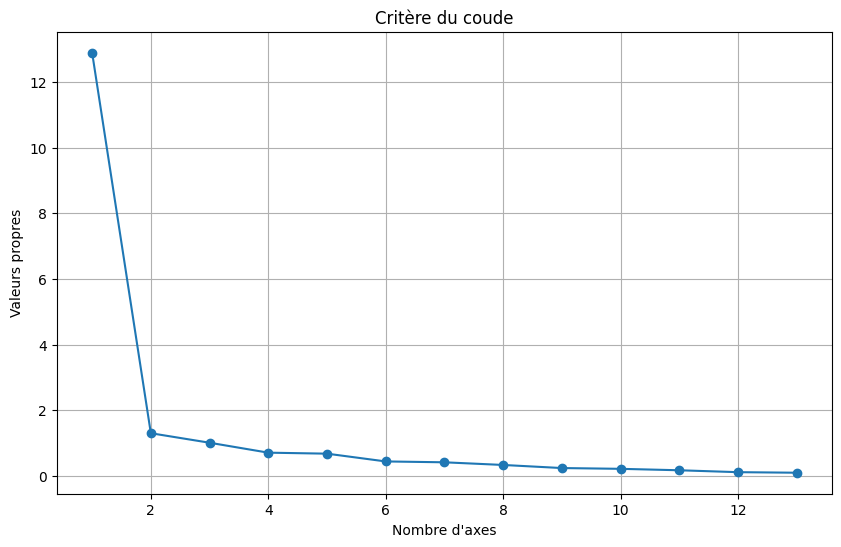

In [ ]:
# eigenvalues
eig = res_pca.explained_variance_
print(eig)

# Calcule cumulative explained variance
cumulative_variance_ratio = explained_variance_ratio.cumsum() * 100

# cumulative explained variance ratio pour les deux premiers axes
print(f"Dans notre cas, les 2 premiers axes cumule {cumulative_variance_ratio[1]:.2f}% de la totale de la variance, alors on devra les utiliser.")

# Plot scree plot (elbow criterion)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eig) + 1), eig, marker='o', linestyle='-')
plt.title("Critère du coude")
plt.xlabel("Nombre d'axes")
plt.ylabel("Valeurs propres")
plt.grid(True)
plt.show()

In [ ]:
#Interprétation:
#On observe un décrochement (coude) suivi d’une décroissance régulière. On sélectionne les axes avant le décrochement. Dans notre cas on retient les deux premiers axes.

In [ ]:
# chargement des variable (coordonnées des variables sur les axes factoriel)
variable_loadings = res_pca.components_.T * np.sqrt(res_pca.explained_variance_)

# variable de contribution de chaque axe
variable_contributions = variable_loadings ** 2

# cos2 (correlations entre variables et axes)
cos2 = variable_contributions / np.sum(variable_contributions, axis=1).reshape(-1, 1)

# eigenvalues associé avec chaque axe
eigenvalues = res_pca.explained_variance_

# Creation du DataFrame pour enregistrer la variable d'information
variable_info = pd.DataFrame({
    'Variable': df_subset.columns,
    'Component 1': variable_loadings[:, 0],
    'Component 2': variable_loadings[:, 1],
    'Contribution au Component 1': variable_contributions[:, 0],
    'Contribution au Component 2': variable_contributions[:, 1],
    'Cos2 Component 1': cos2[:, 0],
    'Cos2 Component 2': cos2[:, 1],
    'Eigenvalues': eigenvalues
})

# variable d'information
print(variable_info)


   Variable  Component 1  Component 2  Contribution au Component 1  \
0        V1    -0.899790    -0.492612                     0.809623   
1        V2    -0.505516    -0.720479                     0.255547   
2        V3    -1.081291     0.277779                     1.169191   
3        V4    -0.834659     0.192956                     0.696655   
4        V5    -1.004252    -0.203323                     1.008521   
5        V6    -1.061523    -0.199807                     1.126832   
6        V7    -1.003114    -0.025913                     1.006237   
7        V8    -1.119246     0.509307                     1.252711   
8        V9    -1.099049     0.098378                     1.207910   
9       V10    -1.055887    -0.005817                     1.114897   
10      V11    -0.972010    -0.177172                     0.944804   
11      V12    -1.002221     0.096328                     1.004447   
12      V13    -1.137687     0.168745                     1.294333   

    Contribution au

In [ ]:
# coordonnées variable coordinates pour chaque axe principal
variable_coordinates = res_pca.components_.T * np.sqrt(res_pca.explained_variance_)

# Creation d'un DataFrame pour enregistrer les coordonnées de la variable
variable_coordinates_df = pd.DataFrame(variable_coordinates, columns=[f"Component {i}" for i in range(1, variable_coordinates.shape[1] + 1)], index=df_subset.columns)

# coordonnées de la variable
print(variable_coordinates_df)


     Component 1  Component 2  Component 3  Component 4  Component 5  \
V1     -0.899790    -0.492612     0.199922    -0.072946    -0.141147   
V2     -0.505516    -0.720479    -0.218491    -0.199821    -0.136249   
V3     -1.081291     0.277779     0.255266    -0.155068     0.059969   
V4     -0.834659     0.192956     0.180700    -0.508381    -0.115276   
V5     -1.004252    -0.203323     0.387372     0.156517     0.408017   
V6     -1.061523    -0.199807     0.185210     0.056033     0.209862   
V7     -1.003114    -0.025913     0.268510     0.312171    -0.086486   
V8     -1.119246     0.509307    -0.176766     0.028391    -0.065994   
V9     -1.099049     0.098378    -0.361736    -0.131838     0.328288   
V10    -1.055887    -0.005817    -0.299840    -0.258871     0.109665   
V11    -0.972010    -0.177172    -0.407930     0.197807    -0.221824   
V12    -1.002221     0.096328    -0.304847     0.350060     0.034593   
V13    -1.137687     0.168745     0.230992     0.063455    -0.47

In [ ]:
#Interprétation:
#la variable V1 est fortement corrélée avec V3 (corrélation positive), modérément corrélée avec V4, V5, V6, V7, V8, V9 et V10 (corrélation positive), et faiblement corrélée avec V2, V11, V12 et V13 (corrélation positive).

In [ ]:
# Calculer les carrés des coefficients de corrélation (cos2) entre les variables et les axes principaux
cos2 = (variable_coordinates ** 2) / np.sum(variable_contributions, axis=1).reshape(-1, 1)

# Créer un DataFrame pour stocker les cos2
cos2_df = pd.DataFrame(cos2, columns=[f"Cos2 Component {i}" for i in range(1, cos2.shape[1] + 1)], index=df_subset.columns)

# Imprimer les cos2
print(cos2_df)

     Cos2 Component 1  Cos2 Component 2  Cos2 Component 3  Cos2 Component 4  \
V1           0.599817          0.179782          0.029611          0.003942   
V2           0.245739          0.499167          0.045906          0.038396   
V3           0.790940          0.052199          0.044080          0.016267   
V4           0.592587          0.031670          0.027775          0.219843   
V5           0.680912          0.027911          0.101312          0.016540   
V6           0.752313          0.026654          0.022902          0.002096   
V7           0.749511          0.000500          0.053703          0.072588   
V8           0.741192          0.153475          0.018488          0.000477   
V9           0.773826          0.006200          0.083829          0.011135   
V10          0.764723          0.000023          0.061666          0.045966   
V11          0.675630          0.022447          0.118998          0.027980   
V12          0.722405          0.006674          0.0

In [ ]:
#Commentaire:
#Les valeurs sur la diagonale de la matrice représentent la proportion de la variance de chaque variable qui est expliquée par l'axe correspondant, et les autres valeurs représentent la corrélation entre chaque variable et chaque axe.Ces valeurs sont importantes car elles permettent d'analyser l'importance de chaque variable dans la construction des axes principaux, ainsi que leur corrélation avec les autres variables et les axes. Cela peut aider à identifier les variables les plus importantes pour expliquer les différences observées entre les individus ou les groupes dans l'analyse.

#La fonction corrpolt génére le corrgram donné ci-dessous qui permet d’étudier les corrélations entre les différnetes variables quantitatives:

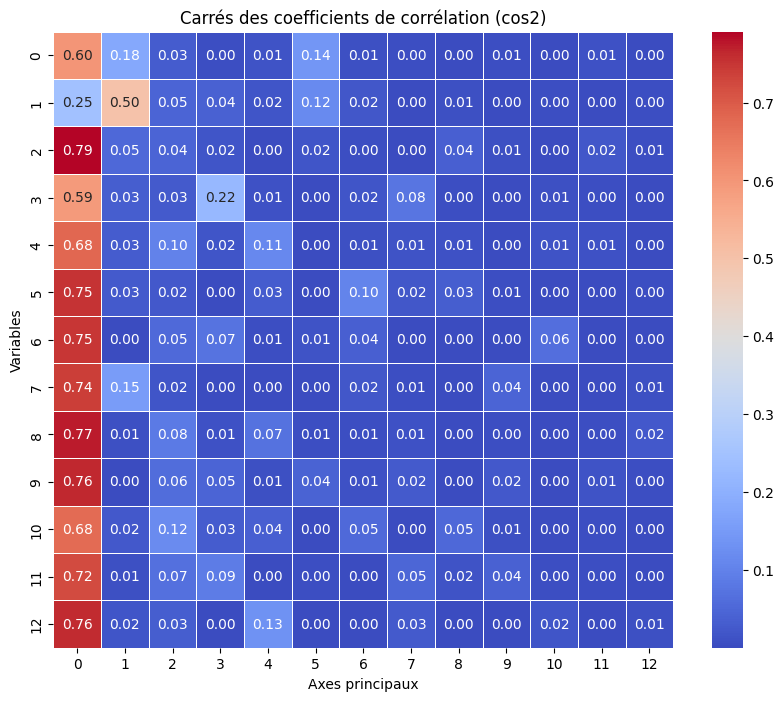

In [ ]:
# Créer une heatmap pour visualiser les cos2
plt.figure(figsize=(10, 8))
sns.heatmap(cos2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Carrés des coefficients de corrélation (cos2)")
plt.xlabel("Axes principaux")
plt.ylabel("Variables")
plt.show()

In [ ]:
#Il est clair qu’il existe des corrélations importantes entre des groupes de variables ce qui suggère la pertinence de cette ACP .

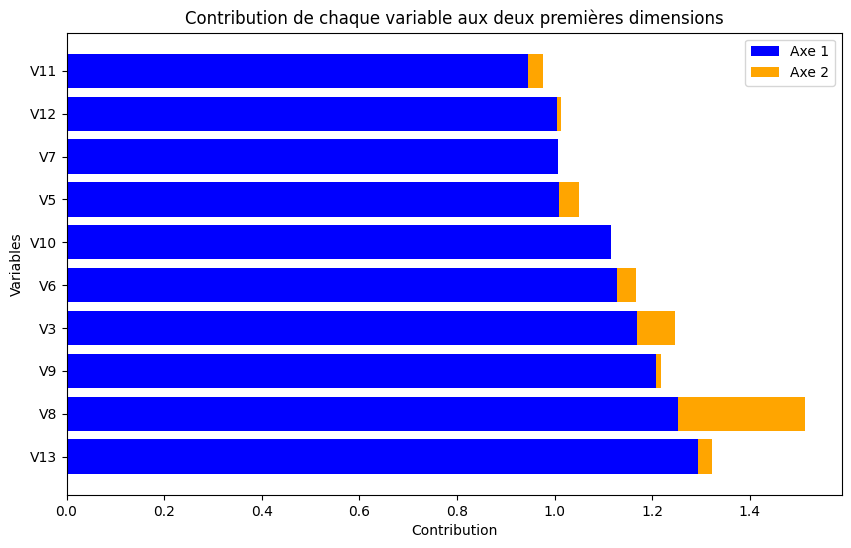

In [ ]:
# Déterminer les variables les plus contributives aux deux premières dimensions
top_contributors = variable_info.sort_values(by=['Contribution au Component 1', 'Contribution au Component 2'], ascending=False).head(10)

# Créer un graphique à barres pour visualiser la contribution des variables
plt.figure(figsize=(10, 6))
plt.barh(top_contributors['Variable'], top_contributors['Contribution au Component 1'], color='blue', label='Axe 1')
plt.barh(top_contributors['Variable'], top_contributors['Contribution au Component 2'], color='orange', label='Axe 2', left=top_contributors['Contribution au Component 1'])
plt.xlabel('Contribution')
plt.ylabel('Variables')
plt.title('Contribution de chaque variable aux deux premières dimensions')
plt.legend()
plt.show()

In [ ]:
#Commentaire:
#La fonction fviz_cos2 permet de visualiser la qualité de représentation de chaque variable sur le premier plan factoriel, c'est-à-dire la proportion de l'information totale contenue dans les données qui est expliquée par chaque variable sur chaque axe factoriel. Cette mesure de qualité est appelée "cos2" (carré du cosinus) et est calculée pour chaque variable. Plus le cos2 d'une variable est élevé, plus cette variable contribue à la formation des axes factoriels et donc à la variance des données.

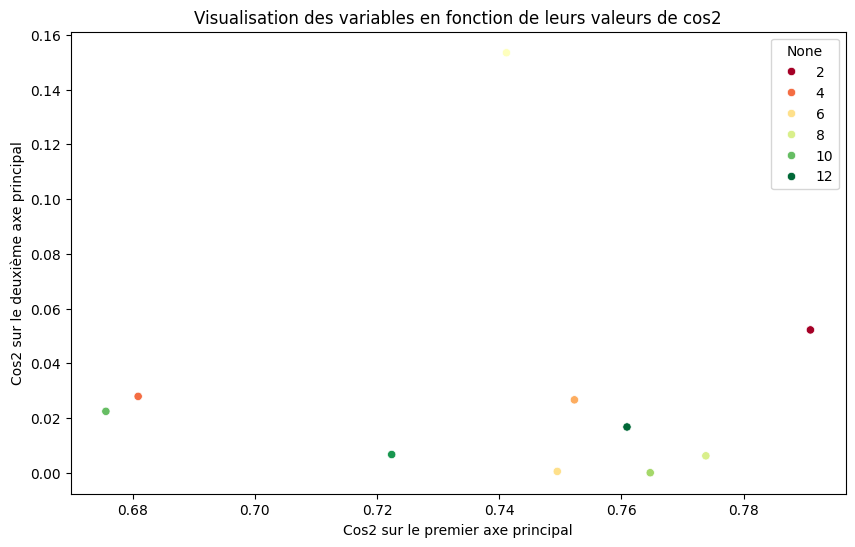

In [ ]:
# Sélectionner les variables avec les plus hautes valeurs de cos2
top_cos2_vars = variable_info.nlargest(10, 'Cos2 Component 1')

# Plot scatter plot pour visualiser les variables en fonction de leurs valeurs de cos2
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cos2 Component 1', y='Cos2 Component 2', data=top_cos2_vars, hue=top_cos2_vars.index, palette='RdYlGn')
plt.title("Visualisation des variables en fonction de leurs valeurs de cos2")
plt.xlabel("Cos2 sur le premier axe principal")
plt.ylabel("Cos2 sur le deuxième axe principal")
plt.show()

In [ ]:
# Interprétation:
#les variables à faible valeur de cos2 sont colorées en “green” (vert) sont fortement corrélé par rapport à l'axe 1 , les variables avec les valeurs moyennes de cos2 sont colorées en “yellow” (jaune) , les variables avec des valeurs élevées de cos2 sont colorées en “red” (rouge)sont faiblement corrélé par rapport à l'axe 1

In [ ]:
### Description des dimensions :
#Dans les sections précédentes, nous avons décrit comment mettre en évidence les variables en fonction de leurs contributions aux composantes principales. la fonction dimdesc() [dans FactoMineR], pour dimension description (en anglais), peut être utilisée pour identifier les variables les plus significativement associées avec une composante principale donnée Elle peut être utilisée comme suit:

In [ ]:
# Sélectionner les variables avec les chargements factoriels les plus élevés pour chaque dimension
top_loadings = variable_info.nlargest(5, ['Component 1', 'Component 2'])

# Sélectionner les variables avec les cos2 les plus élevés pour chaque dimension
top_cos2 = variable_info.nlargest(5, ['Cos2 Component 1', 'Cos2 Component 2'])

# Afficher les variables les plus fortement corrélées à chaque dimension et leur niveau de signification
print("Variables les plus fortement corrélées à la première dimension :")
print(top_loadings[['Component 1']])
print("\nVariables les plus fortement corrélées à la deuxième dimension :")
print(top_loadings[['Component 2']])
print("\nVariables avec les plus hauts cos2 sur la première dimension :")
print(top_cos2[['Cos2 Component 1']])
print("\nVariables avec les plus hauts cos2 sur la deuxième dimension :")
print(top_cos2[['Cos2 Component 2']])


Variables les plus fortement corrélées à la première dimension :
    Component 1
1     -0.505516
3     -0.834659
0     -0.899790
10    -0.972010
11    -1.002221

Variables les plus fortement corrélées à la deuxième dimension :
    Component 2
1     -0.720479
3      0.192956
0     -0.492612
10    -0.177172
11     0.096328

Variables avec les plus hauts cos2 sur la première dimension :
    Cos2 Component 1
2           0.790940
8           0.773826
9           0.764723
12          0.760917
5           0.752313

Variables avec les plus hauts cos2 sur la deuxième dimension :
    Cos2 Component 2
2           0.052199
8           0.006200
9           0.000023
12          0.016740
5           0.026654


In [ ]:
# Explication:
#la première colonne indique la corrélation entre chaque variable et la composante principale 1 (la plus grande composante principale), tandis que la deuxième colonne indique la valeur de p associée à cette corrélation(une mesure de la confiance).

#Ainsi, par exemple, la variable V3 a une corrélation de 0,885 avec la première composante principale, avec une valeur de p très faible (1,42 * 10^-18), ce qui suggère une forte corrélation entre V3 et la première composante principale. De même, la variable V2 a une corrélation plus faible (0,515) avec la première composante principale, avec une valeur de p de 8,05 * 10^-5, ce qui suggère une corrélation moins forte mais tout de même significative entre V2 et la première composante principale.

In [ ]:
# Sélectionner les variables avec les chargements factoriels les plus élevés pour chaque dimension
top_loadings_dim1 = variable_info.nlargest(5, 'Component 1')
top_loadings_dim2 = variable_info.nlargest(5, 'Component 2')

# Sélectionner les variables avec les cos2 les plus élevés pour chaque dimension
top_cos2_dim1 = variable_info.nlargest(5, 'Cos2 Component 1')
top_cos2_dim2 = variable_info.nlargest(5, 'Cos2 Component 2')

# Afficher les variables les plus fortement corrélées à chaque dimension
print("Variables les plus fortement corrélées à la première dimension :")
print(top_loadings_dim1[['Component 1']])
print("\nVariables les plus fortement corrélées à la deuxième dimension :")
print(top_loadings_dim2[['Component 2']])
print("\nVariables avec les plus hauts cos2 sur la première dimension :")
print(top_cos2_dim1[['Cos2 Component 1']])
print("\nVariables avec les plus hauts cos2 sur la deuxième dimension :")
print(top_cos2_dim2[['Cos2 Component 2']])


Variables les plus fortement corrélées à la première dimension :
    Component 1
1     -0.505516
3     -0.834659
0     -0.899790
10    -0.972010
11    -1.002221

Variables les plus fortement corrélées à la deuxième dimension :
    Component 2
7      0.509307
2      0.277779
3      0.192956
12     0.168745
8      0.098378

Variables avec les plus hauts cos2 sur la première dimension :
    Cos2 Component 1
2           0.790940
8           0.773826
9           0.764723
12          0.760917
5           0.752313

Variables avec les plus hauts cos2 sur la deuxième dimension :
   Cos2 Component 2
1          0.499167
0          0.179782
7          0.153475
2          0.052199
3          0.031670


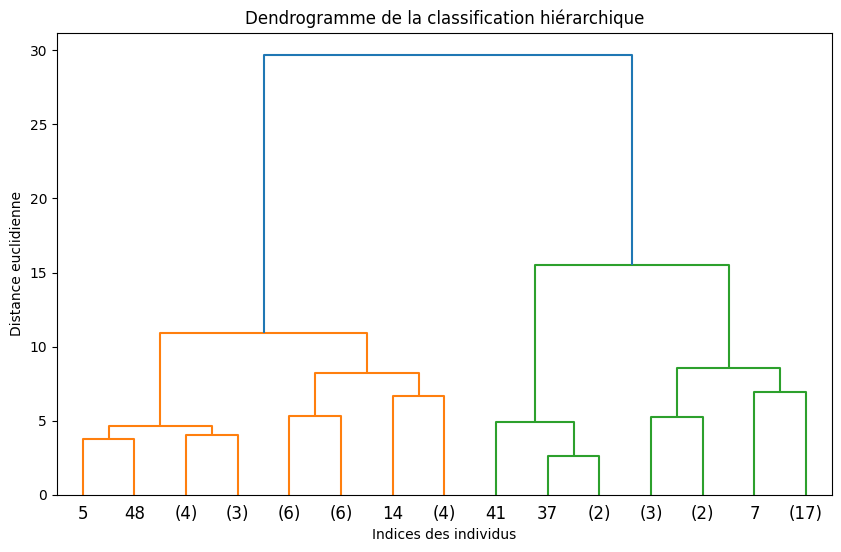

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Calculer la matrice de liaison à partir des données de clustering
Z = linkage(df_subset, method='ward')

# Afficher le dendrogramme
plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode='level', p=3)
plt.title('Dendrogramme de la classification hiérarchique')
plt.xlabel('Indices des individus')
plt.ylabel('Distance euclidienne')
plt.show()


In [ ]:
# Interprétation:
#Ce code effectue une classification hiérarchique ascendante (HCA) basée sur les résultats de l'analyse en composantes principales (PCA) effectuée précédemment. Le résultat de cette classification est affiché sous forme de dendrogramme à l'aide de la fonction "fviz_dend".

#Le dendrogramme représente les différents groupes de variables qui ont été regroupées en clusters en fonction de leur proximité dans l'espace des composantes principales. Les groupes sont représentés par des branches qui se séparent en sous-groupes, et la hauteur de chaque branche correspond à la distance entre les groupes.

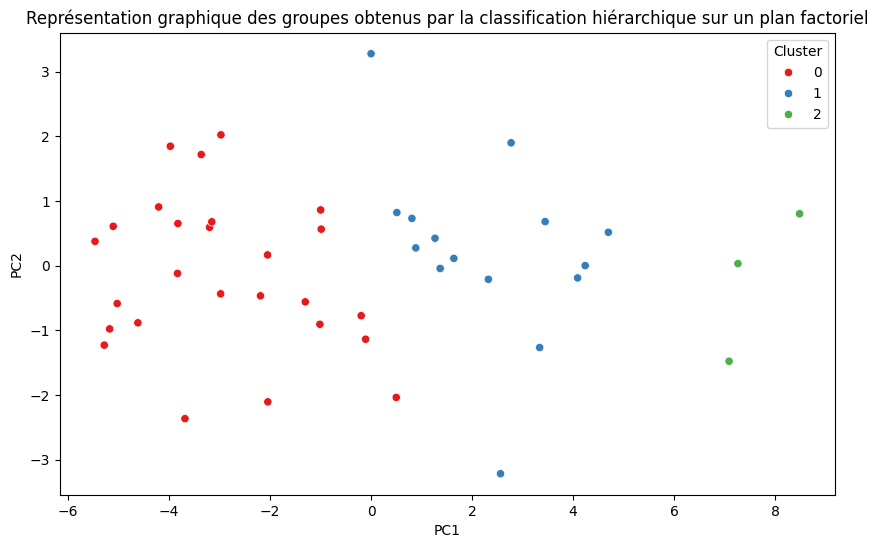

In [ ]:
from sklearn.cluster import AgglomerativeClustering
# Effectuer une classification hiérarchique des individus
cluster = AgglomerativeClustering(n_clusters=3).fit(df_subset)

# Obtenir les étiquettes de cluster pour chaque individu
cluster_labels = cluster.labels_

# Effectuer une ACP pour obtenir un plan factoriel
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_subset)

# Créer un DataFrame pour stocker les résultats de l'ACP
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Ajouter les étiquettes de cluster au DataFrame
pca_df['Cluster'] = cluster_labels

# Visualiser les résultats de la classification hiérarchique sur un plan factoriel
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set1')
plt.title('Représentation graphique des groupes obtenus par la classification hiérarchique sur un plan factoriel')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.show()


In [ ]:
# Interprétation:
#La proportion de variance expliquée par chaque valeur propre est donnée dans la deuxième colonne. Par exemple, 8.85637685  divisé par 13(nombre de variable) est égal à environ 68.1% de la variance est expliquée par cette première valeur propre .Dans ce cas, la première dimension capture une grande partie de la variation des données et peut donc être considérée comme importante pour la compréhension des relations entre les variables dans l'ensemble de données.Le pourcentage cumulé expliqué est obtenu en ajoutant les proportions successives de variances expliquées. Par exemple, 68.1% plus 0.8% sont égaux à 68.9%, et ainsi de suite. Par conséquent,environ 68.9% de la variance totale est expliquée par les deux premières valeurs propres. Les valeurs propres peuvent être utilisées pour déterminer le nombre d’axes principaux à conserver après l’analyse.

#1er classe (bleu):il s'intéresse pas au qualité du service d'achat.
#2éme classe(jaune):il est neutre
#3éme classe(gris):il accorde une importance au qualité du service d'achat

In [ ]:
!pip install prince


In [ ]:
import sklearn
#scree plot
import matplotlib.pyplot as plt
Tab = pd.read_excel("commerce.xlsx",sheet_name=0,header=0,index_col=0)
print(Tab)
# Créer un tableau disjonctif complet pour les variables qualitatives
X = pd.get_dummies(Tab)
# Afficher le tableau disjonctif complet
print(X)


                     Horodateur   sexe achat_en_ligne       âge   \
0   2023/04/02 2:27:17 AM UTC+1  Homme            oui  36-45 ans   
1   2023/04/02 2:28:44 AM UTC+1  Femme            oui  18-25 ans   
2   2023/04/02 2:28:48 AM UTC+1  Homme            non  36-45 ans   
3   2023/04/02 2:29:50 AM UTC+1  Homme            oui  18-25 ans   
4   2023/04/02 2:29:59 AM UTC+1  Homme            non  18-25 ans   
..                          ...    ...            ...        ...   
58  2023/04/05 1:28:03 PM UTC+1  Homme            oui  18-25 ans   
59  2023/04/05 2:38:45 PM UTC+1  Homme            oui  18-25 ans   
60  2023/04/05 8:42:43 PM UTC+1  Homme            oui  18-25 ans   
61  2023/04/06 2:41:39 PM UTC+1  Homme            oui  18-25 ans   
62  2023/04/06 5:18:39 PM UTC+1  Femme            oui  18-25 ans   

         région            profession  Jumia  Tayara  eBay  Electrotounsi  \
0        Sud-Est  Profession libérale    Oui     Oui   Oui            Oui   
1       Nord-Est             

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Assuming X is your data
print(X.shape)  # Check the shape of your data

# Get the number of observations and variables
n = X.shape[0]
p = X.shape[1]

# Instantiate the imputer with the desired strategy
imputer = SimpleImputer(strategy='mean')

# Impute missing values
X_imputed = imputer.fit_transform(X)

# Standardize the data
sc = StandardScaler()
Z = sc.fit_transform(X_imputed)

# Instantiate PCA
acp = PCA()

# Perform PCA
coord = acp.fit_transform(Z)

# Variance explained
valprop = acp.explained_variance_
inert = acp.explained_variance_ratio_ * 100
cuminert = np.cumsum(acp.explained_variance_ratio_) * 100

# Print the results
print(pd.DataFrame({'valprop': valprop, 'inertie': inert, 'inertiecum': cuminert}))

(63, 140)
         valprop       inertie  inertiecum
0   1.399238e+01  9.835915e+00    9.835915
1   1.049870e+01  7.380038e+00   17.215953
2   8.354425e+00  5.872725e+00   23.088678
3   5.952860e+00  4.184550e+00   27.273228
4   5.162192e+00  3.628752e+00   30.901979
..           ...           ...         ...
58  1.032518e+00  7.258065e-01   97.822581
59  1.032518e+00  7.258065e-01   98.548387
60  1.032518e+00  7.258065e-01   99.274194
61  1.032518e+00  7.258065e-01  100.000000
62  2.750861e-30  1.933712e-30  100.000000

[63 rows x 3 columns]


[[-1.25072760e-01 -3.78155305e-02 -1.60247683e-01 ...  1.29568660e-01
  -1.40144405e-01  7.42133933e-02]
 [-1.78724562e-01 -1.70475236e-01 -1.90012670e-01 ... -7.18126442e-02
   4.92823525e-02 -4.09571953e-02]
 [-5.22613538e-02  5.63302323e-04 -7.78127603e-02 ...  2.34730934e-02
   7.83631778e-02 -2.30236339e-02]
 ...
 [ 3.87162712e-16  7.66366400e-16  2.57822456e-16 ... -3.56033550e-17
   3.41935447e-16  2.60040086e-16]
 [-4.36514677e-15 -6.84139389e-15  1.04081834e-14 ... -4.10549610e-15
  -1.11117282e-16 -4.20797406e-15]
 [ 2.05941354e-01 -5.51436800e-02  7.06369210e-02 ... -7.20433042e-02
  -8.33683621e-02 -6.54205966e-02]]
                                                    ID   corvar1   corvar2  \
0                                       Clarté du site -0.467852 -0.579098   
1                                       Design du site -0.141454 -0.552369   
2                                                choix -0.599429 -0.615673   
3                                           La varié

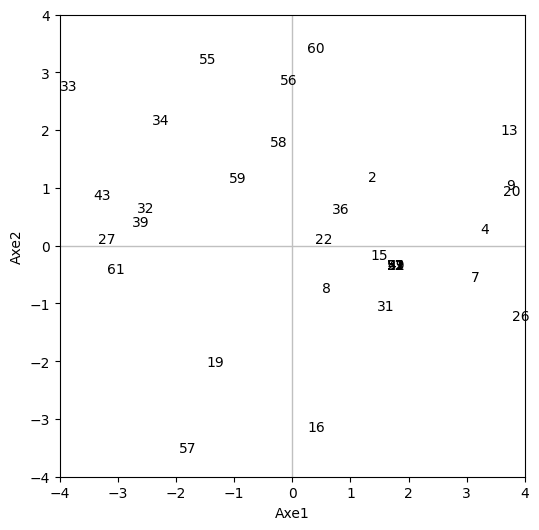

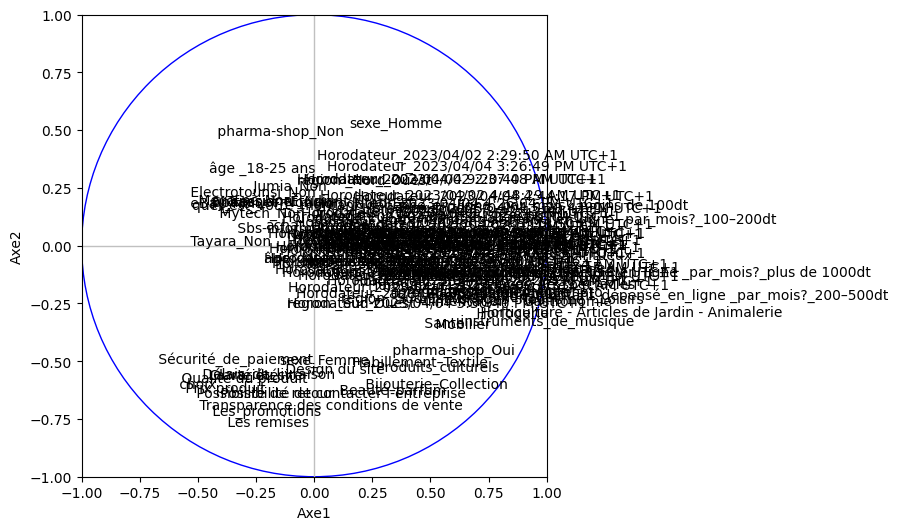

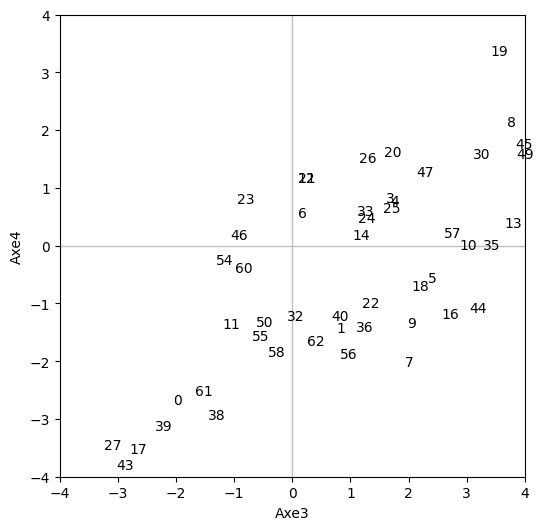

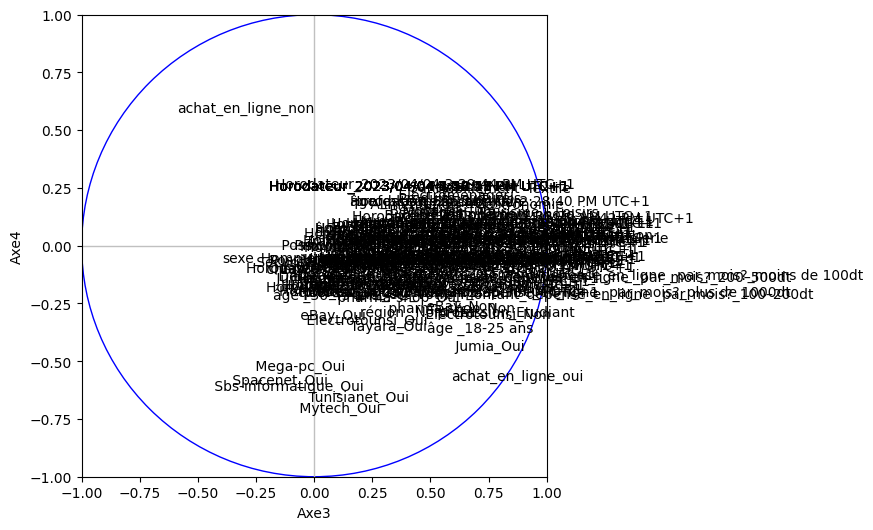

In [ ]:
vectprop=print(acp.components_)
#contribution des individus dans l'inertie Axe1 et qualité representation sur Axe1
A=coord**2
Ctr1=(A[:,0]/(n*valprop[0]))*100
normind=np.sum(Z**2,axis=1)
Cos1=(A[:,0]/normind)*100
#contribution des individus dans l'inertie Axe2 et qualité representation sur Axe2
Ctr2=(A[:,1]/(n*valprop[1]))*100
Cos2=(A[:,1]/normind)*100
#contribution des individus dans l'inertie Axe3 et qualité representation sur Axe3
Ctr3=(A[:,2]/(n*valprop[2]))*100
Cos3=(A[:,2]/normind)*100
#contribution des individus dans l'inertie Axe4 qualité representation sur Axe4
Ctr4=(A[:,3]/(n*valprop[3]))*100
Cos4=(A[:,3]/normind)*100


sqrt_eigval = np.sqrt(valprop)
corvar1=acp.components_[0,:] * sqrt_eigval[0]
corvar2=acp.components_[1,:] * sqrt_eigval[1]
corvar3=acp.components_[2,:] * sqrt_eigval[2]
corvar4=acp.components_[3,:] * sqrt_eigval[3]
#contribution des variables
Ctrvar1=(corvar1**2)/(valprop[0])*100
Ctrvar2=(corvar2**2)/(valprop[1])*100
Ctrvar3=(corvar3**2)/(valprop[2])*100
Ctrvar4=(corvar4**2)/(valprop[3])*100
#qualité des variables
Cosvar1=(corvar1**2)*100
Cosvar2=(corvar2**2)*100
Cosvar3=(corvar3**2)*100
Cosvar4=(corvar4**2)*100
print(pd.DataFrame({'ID':X.columns,'corvar1':corvar1,'corvar2':corvar2,'corvar3':corvar3,'corvar4':corvar4,'Ctrvar1':Ctrvar1,'Ctrvar2':Ctrvar2,'Ctrvar3':Ctrvar3,'Cosvar1':Cosvar1,'Cosvar2':Cosvar2,'Cosvar3':Cosvar3 }))
print(pd.DataFrame({'ID':X.index,'Contr_1':Ctr1,'Contr_2':Ctr2,'Contr_3':Ctr3,'Contr_4':Ctr4,'Coscar_1':Cos1,'Coscar_2':Cos2, 'Coscar_3':Cos3 ,'Coscar_4':Cos4  }))
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(6,6))
axes.set_xlim(-4,4) #même limites en abscisse
axes.set_ylim(-4,4) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
 plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-4,4],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-4,4],color='silver',linestyle='-',linewidth=1)
plt.xlabel('Axe1')
plt.ylabel('Axe2')
#affichage
plt.show()

#cercle des corrélations
fig, axes = plt.subplots(figsize=(6,6))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(X.columns[j],(corvar1[j],corvar2[j]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
plt.xlabel('Axe1')
plt.ylabel('Axe2')
#affichage
plt.show()

#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(6,6))
axes.set_xlim(-4,4) #même limites en abscisse
axes.set_ylim(-4,4) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
 plt.annotate(X.index[i],(coord[i,2],coord[i,3]))
#ajouter les axes
plt.plot([-4,4],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-4,4],color='silver',linestyle='-',linewidth=1)
plt.xlabel('Axe3')
plt.ylabel('Axe4')
#affichage
plt.show()


#cercle des corrélations
fig, axes = plt.subplots(figsize=(6,6))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(X.columns[j],(corvar3[j],corvar4[j]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
plt.xlabel('Axe3')
plt.ylabel('Axe4')
#affichage
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     0
0    0
0   38
0   18
0   17
0   44
..  ..
2   20
2   34
2   37
2   22
2   31

[63 rows x 1 columns]
    Classe  ID     DistG1     DistG2    DistG3
0        1   0   3.181367   8.494313  6.590578
1        2   1   9.842311   4.185531  8.493523
2        3   2   9.656402   8.165594  5.721872
3        3   3  11.016855  12.969927  7.886590
4        1   4   2.999349   7.773421  6.098829
..     ...  ..        ...        ...       ...
58       3  58   8.023160   6.944112  5.186202
59       3  59   8.739056   6.704450  5.441942
60       3  60   7.640098   8.444620  5.345241
61       2  61   9.185374   5.690546  7.656555
62       2  62  10.117860   4.405210  8.221769

[63 rows x 5 columns]


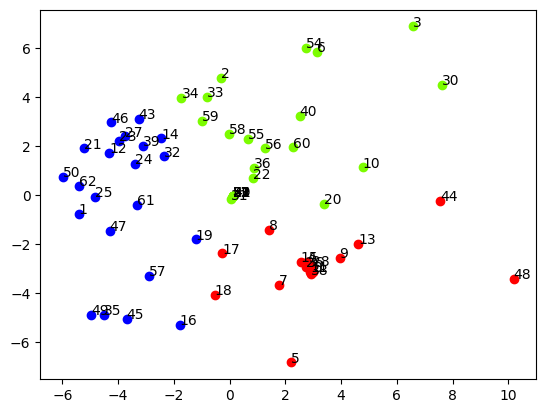

In [ ]:
from sklearn.cluster import KMeans
# Traitement des valeurs manquantes dans X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# K-means avec 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_imputed)

# Index triés des groupes
idk = np.argsort(kmeans.labels_)

# Affichage des observations et leurs groupes
Cldf = pd.DataFrame(X.index[idk], kmeans.labels_[idk])
print(Cldf)

# Distances aux centres de classes des observations
A = kmeans.transform(X_imputed)
print(pd.DataFrame({'Classe': kmeans.labels_+1, 'ID': X.index, 'DistG1': A[:,0], 'DistG2': A[:,1], 'DistG3': A[:,2]}))

# ACP
acp = PCA(n_components=2).fit_transform(X_imputed)

# Projeter dans le plan factoriel avec un code couleur différent selon le groupe
for couleur, k in zip(['red', 'blue', 'lawngreen'], [0, 1, 2]):
    plt.scatter(acp[kmeans.labels_ == k, 0], acp[kmeans.labels_ == k, 1], c=couleur)

# Mettre les labels des points
n = X.shape[0]
for i in range(n):
    plt.annotate(X.index[i], (acp[i, 0], acp[i, 1]))

plt.show()
